In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab  as plt
import yfinance as yf
from datetime import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [2]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')

# Exploring and cleaning data

In [3]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:

df['date'] = pd.to_datetime(df['date'], errors='coerce')
#setting date to index
df.set_index('date', inplace=True)
df.tail()

,Unnamed: 0,headline,url,publisher,stock
date,,,,,
NaT,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,ZX
NaT,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,ZX
NaT,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,ZX
NaT,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,ZX
NaT,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,ZX


In [5]:
print(f'Before cleaning {df.shape}')
#dropping not a time object
#resetting index
df.reset_index('date', inplace=True)
df = df.dropna()

#setting back the index
df.set_index('date', inplace=True)
print(f'After cleaning {df.shape}')

Before cleaning (1407328, 5)
After cleaning (55987, 5)


# Sentiment analysis on the headline

In [6]:

#df['date'] = df['date'].dt.tz_localize(None)

In [7]:
from tqdm import tqdm
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
res = {}
sia = SentimentIntensityAnalyzer()
for i, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing rows"):
    headline = row['headline']
    res[i] = sia.polarity_scores(headline)

Processing rows: 100%|██████████████████| 55987/55987 [00:35<00:00, 1593.13it/s]


In [9]:
#converting to dataframe the result dict
res = pd.DataFrame(res).T
res.head()

,neg,neu,pos,compound
2020-06-05 10:30:54-04:00,0.0,1.000,0.000,0.000
2020-06-03 10:45:20-04:00,0.0,1.000,0.000,0.000
2020-05-26 04:30:07-04:00,0.0,1.000,0.000,0.000
2020-05-22 12:45:06-04:00,0.0,1.000,0.000,0.000
2020-05-22 11:38:59-04:00,0.0,0.833,0.167,0.296


In [10]:
res.reset_index(inplace=True) #resetting so we can merge it
df.reset_index(inplace=True) 
res.rename(columns={'index': 'date'}, inplace=True)

#merge
vaders = res.merge(df, how='left')
vaders.head()

#setting back the index
vaders.set_index('date', inplace=True)
vaders.head()

,neg,neu,pos,compound,Unnamed: 0,headline,url,publisher,stock
date,,,,,,,,,
2020-06-05 10:30:54-04:00,0.0,1.0,0.0,0.0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A
2020-06-05 10:30:54-04:00,0.0,1.0,0.0,0.0,7748,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,AAWW
2020-06-05 10:30:54-04:00,0.0,1.0,0.0,0.0,9458,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,ABC
2020-06-05 10:30:54-04:00,0.0,1.0,0.0,0.0,20669,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,ACTG
2020-06-05 10:30:54-04:00,0.0,1.0,0.0,0.0,24824,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,ADI



# Loading stock data

In [11]:
len(vaders['stock'].unique()) #uniquely available stock in our data

6204

### Choosing samples to load and analyze

In [12]:
#since the sentiment data droping headline and url column
vaders.drop(columns=['headline', 'url'], inplace=True)
vaders.head()

,neg,neu,pos,compound,Unnamed: 0,publisher,stock
date,,,,,,,
2020-06-05 10:30:54-04:00,0.0,1.0,0.0,0.0,0,Benzinga Insights,A
2020-06-05 10:30:54-04:00,0.0,1.0,0.0,0.0,7748,Benzinga Insights,AAWW
2020-06-05 10:30:54-04:00,0.0,1.0,0.0,0.0,9458,Benzinga Insights,ABC
2020-06-05 10:30:54-04:00,0.0,1.0,0.0,0.0,20669,Benzinga Insights,ACTG
2020-06-05 10:30:54-04:00,0.0,1.0,0.0,0.0,24824,Benzinga Insights,ADI


In [13]:
grouped_df = df.groupby('stock')['date'].agg(['min', 'max'])

grouped_df.head()


,min,max
stock,,
A,2020-05-22 08:06:17-04:00,2020-06-05 10:30:54-04:00
AA,2020-05-18 10:50:11-04:00,2020-06-09 10:52:15-04:00
AAC,2019-08-30 08:10:37-04:00,2019-10-25 16:09:59-04:00
AADR,2013-03-05 15:42:46-04:00,2013-09-06 15:06:35-04:00
AAL,2020-06-08 10:19:28-04:00,2020-06-10 11:21:01-04:00


In [14]:
start_date_bby = grouped_df.loc['BBY', 'min']
end_date_bby = grouped_df.loc['BBY', 'max']

print(f"The news sentiment data touchs the Stock on this range\nStart date: {start_date_bby}\nEnd date: {end_date_bby}")

The news sentiment data touchs the Stock on this range
Start date: 2020-05-21 12:13:54-04:00
End date: 2020-06-04 15:41:30-04:00


In [15]:
# loading data for all time which earliest upto latest
df_bby = yf.download('BBY', start=start_date_bby, end=end_date_bby)

# loading a year data for extra analysis since 10 days of data is not enough
# since news frquency was high at 2020
start_date_2020 = datetime(2020,1,1)
end_date_2020 = datetime(2020,12,31)

df_bby_2020 = yf.download('BBY', start=start_date_2020, end=end_date_2020)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [16]:
df_bby.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-21,79.500000,81.910004,76.879997,77.980003,67.238312,6370300
2020-05-22,78.989998,78.989998,75.820000,76.919998,66.324341,4687600
2020-05-26,79.760002,81.160004,79.300003,79.470001,68.523079,2953200
2020-05-27,81.339996,81.339996,78.339996,79.080002,68.186798,2894300
2020-05-28,80.190002,80.190002,76.190002,76.430000,65.901833,3152400


In [17]:
df_bby.reset_index(inplace=True)
df_bby.rename(columns={'Date':'date'}, inplace=True)


In [18]:
#convert datetime object type
vaders.reset_index(inplace=True)
vaders['date'] = vaders['date'].dt.tz_localize(None)
vaders.head()

,date,neg,neu,pos,compound,Unnamed: 0,publisher,stock
0,2020-06-05 10:30:54,0.0,1.0,0.0,0.0,0,Benzinga Insights,A
1,2020-06-05 10:30:54,0.0,1.0,0.0,0.0,7748,Benzinga Insights,AAWW
2,2020-06-05 10:30:54,0.0,1.0,0.0,0.0,9458,Benzinga Insights,ABC
3,2020-06-05 10:30:54,0.0,1.0,0.0,0.0,20669,Benzinga Insights,ACTG
4,2020-06-05 10:30:54,0.0,1.0,0.0,0.0,24824,Benzinga Insights,ADI


In [19]:
merged_df_bby = vaders.merge(df_bby, on='date', how='left')

In [20]:
merged_df_bby.head()

,date,neg,neu,pos,compound,Unnamed: 0,publisher,stock,Open,High,Low,Close,Adj Close,Volume
0,2020-06-05 10:30:54,0.0,1.0,0.0,0.0,0,Benzinga Insights,A,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-06-05 10:30:54,0.0,1.0,0.0,0.0,7748,Benzinga Insights,AAWW,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-06-05 10:30:54,0.0,1.0,0.0,0.0,9458,Benzinga Insights,ABC,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-06-05 10:30:54,0.0,1.0,0.0,0.0,20669,Benzinga Insights,ACTG,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-06-05 10:30:54,0.0,1.0,0.0,0.0,24824,Benzinga Insights,ADI,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
vaders.set_index('date',inplace=True)

In [22]:
#The values are null because of different reason
# @@@ The stock market open with different time line so if the stock is not open at the time of 
# the news release the stock value will be NaN
# to drop the value we can aggregate the news data with a day average

# print(f'Before Aggregating: {merged_df_bby.isna().sum()})

sentiment_daily_mean = vaders[['compound', 'neg', 'neu', 'pos']].resample('1D').mean()

#from pandas.Series to DataFrame
sentiment_mean = pd.DataFrame(sentiment_daily_mean)

#reseting the index
sentiment_mean.reset_index('date', inplace=True)

merged_daily_bby = df_bby.merge(sentiment_mean,on='date', how='left')

In [23]:

print(merged_daily_bby.isna().sum()) #perfectly removed the null value

date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
compound     0
neg          0
neu          0
pos          0
dtype: int64


In [24]:
merged_daily_bby.set_index('date', inplace=True)

In [25]:
df_bby.shape

(10, 7)

## Computing Monthly closing price change

<AxesSubplot:title={'center':'Daily Percentage Change'}>

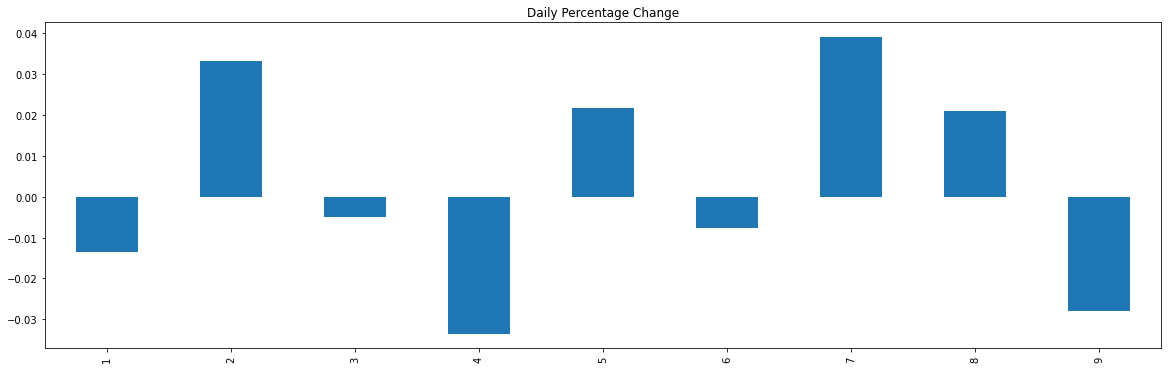

In [26]:
df_bby['Adj Close'].pct_change().dropna().plot(kind='bar', title='Daily Percentage Change',figsize=(20,6))

<AxesSubplot:title={'center':'Daily Percentage Change'}, xlabel='Date'>

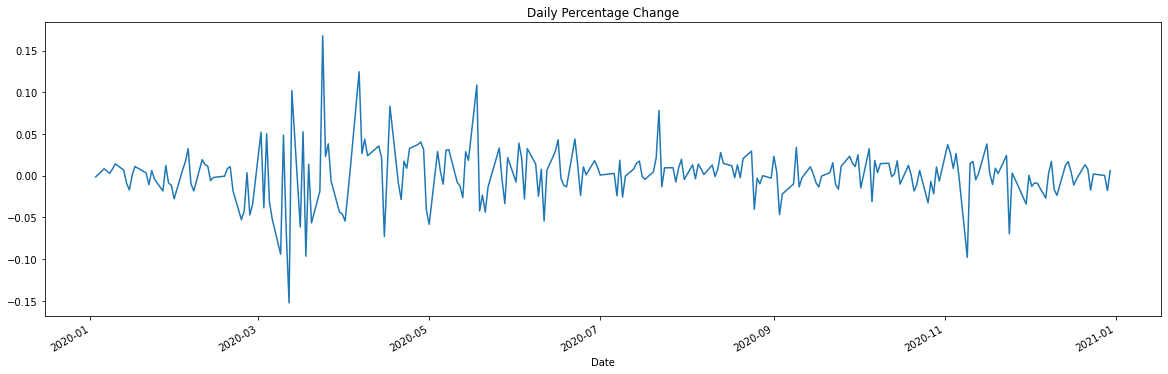

In [28]:
## Daily percentage for year 2024
df_bby_2020['Adj Close'].pct_change().dropna().plot(title='Daily Percentage Change',figsize=(20,6))

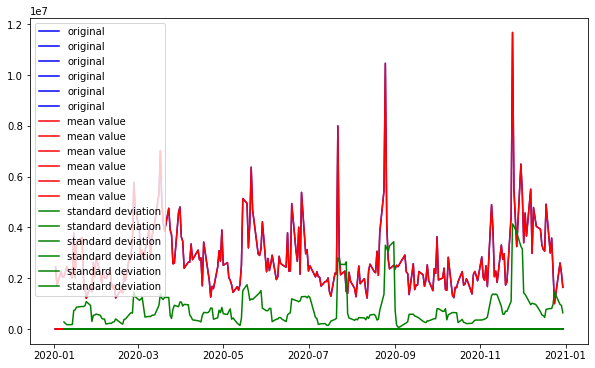

In [29]:
rolmean = df_bby_2020.rolling(window=5).mean()
rolstd = df_bby_2020.rolling(window = 5).std()

orig = plt.plot(df_bby_2020, label ='original',color = 'blue')
mean = plt.plot(df_bby_2020, label = "mean value", color = "red")
std = plt.plot(rolstd , label = 'standard deviation', color = 'green')
plt.legend(loc='best')
plt.show(block=False)

## Moving Average

### Simple Moving Average

In [37]:
df_bby_2020['Log Open'] = np.log(df_bby_2020['Open'])
df_bby_2020['SMA_open_10'] = df_bby_2020['Open'].rolling(window=10).mean()

<AxesSubplot:title={'center':'Simple Moving Average vs Opening price of 2020'}, xlabel='Date'>

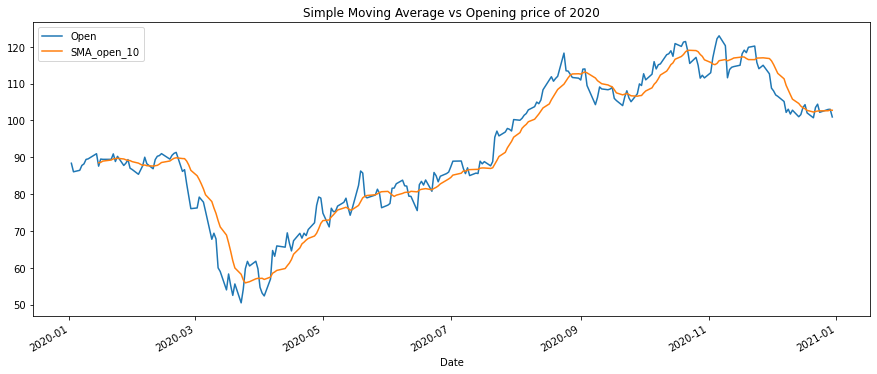

In [41]:
df_bby_2020[['Open', 'SMA_open_10']].plot(title='Simple Moving Average vs Opening price of 2020', figsize=(15,6))

### Exponential weighted moving average

In [44]:
df_bby_2020['EWM_open_10'] = df_bby_2020['Open'].ewm(span=10).mean()

<AxesSubplot:title={'center':'Simple Moving Average, Exponential weighted  vs Opening price of 2020'}, xlabel='Date'>

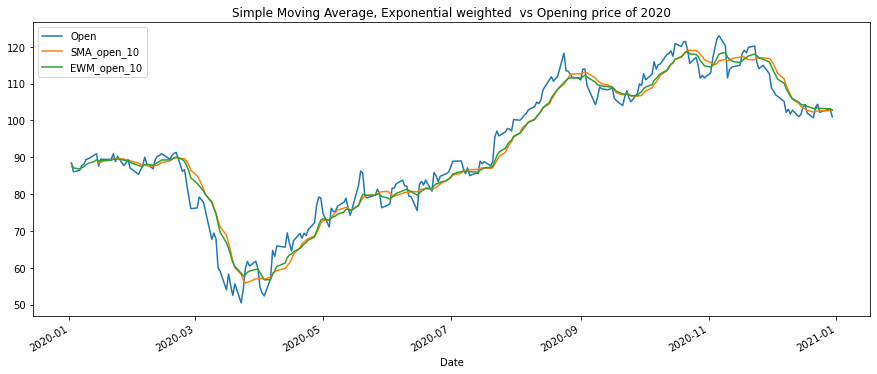

In [45]:
df_bby_2020[['Open', 'SMA_open_10', 'EWM_open_10']].plot(title='Simple Moving Average, Exponential weighted  vs Opening price of 2020', figsize=(15,6))


# Testing using statstical method: correlation 

In [46]:
from statsmodels.tsa.stattools import adfuller

In [47]:
def adf_test(tm_series):
    result = adfuller(tm_series)
    print(f'ADF Statstics: {result[0]}')
    print(f'P-value:\t\t{result[1]}')
    
    if result[1] <= 0.05:
        print('Data is stationary and accepted')
    else:
        print('Data is not stationary null hypotesis accepted')

In [48]:
df_bby_2020.head()

,Open,High,Low,Close,Adj Close,Volume,Log Open,SMA_open_10,EWM_open_10
Date,,,,,,,,,
2020-01-02,88.389999,88.440002,86.959999,87.309998,74.596687,2447500,4.481759,NaN,88.389999
2020-01-03,86.070000,87.639999,85.910004,87.180000,74.485619,1713600,4.455161,NaN,87.114000
2020-01-06,86.470001,87.919998,86.250000,87.910004,75.109322,2270100,4.459798,NaN,86.855117
2020-01-07,87.790001,89.209999,87.459999,88.410004,75.536522,2040900,4.474948,NaN,87.163119
2020-01-08,88.209999,89.370003,87.860001,88.650002,75.741562,2047000,4.479720,NaN,87.463650


In [62]:
adf_test(df_bby_2020['Open'])

ADF Statstics: -1.0497923046695767
P-value:		0.7346735515633248
Data is not stationary null hypotesis accepted


In [63]:
## transformation required
df_bby_2020['Open_shift_1'] = df_bby_2020['Open'] - df_bby_2020['Open'].shift(1)
adf_test(df_bby_2020['Open_shift_1'].dropna())

ADF Statstics: -15.219375148503719
P-value:		5.512619539758336e-28
Data is stationary and accepted


In [65]:

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error



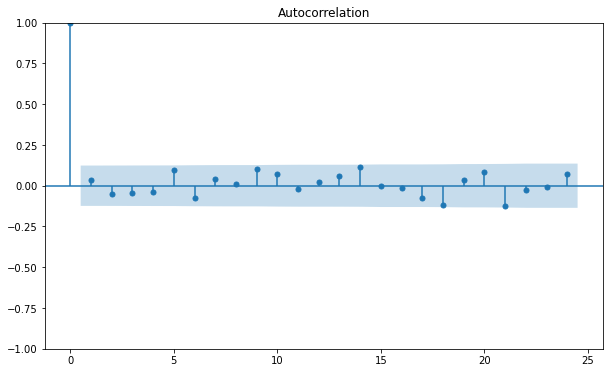

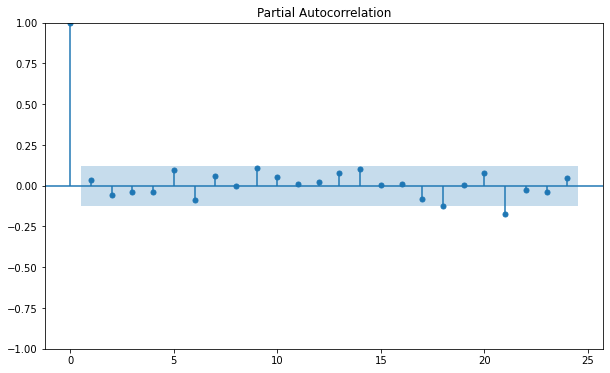

In [69]:
acf = plot_acf(df_bby_2020['Open_shift_1'].dropna())
pacf = plot_pacf(df_bby_2020['Open_shift_1'].dropna())

In [71]:
from datetime import timedelta

In [72]:
#train and test dataset
train_dataset_end = datetime(2020,6,1)
test_dataset_end = datetime(2020,12,1)
train_data = df_bby_2020[:train_dataset_end]
test_data = df_bby_2020[train_dataset_end + timedelta(days=1):test_dataset_end]

In [78]:
model = ARIMA(train_data['Open'], order=(1,1,2))

/home/berna/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/berna/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/berna/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [79]:
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  104
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -251.811
Date:                Sat, 04 May 2024   AIC                            511.623
Time:                        12:09:18   BIC                            522.162
Sample:                             0   HQIC                           515.891
                                - 104                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7328      0.369     -1.985      0.047      -1.456      -0.009
ma.L1          0.8252      0.412      2.003      0.045       0.018       1.633
ma.L2         -0.0069      0.157     -0.044      0.9

In [88]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)
test_data.loc[pred_start_date]

2020-06-02 00:00:00
2020-12-01 00:00:00


Open            7.747000e+01
High            8.055000e+01
Low             7.738000e+01
Close           8.053000e+01
Adj Close       6.943705e+01
Volume          2.777700e+06
Log Open        4.349891e+00
SMA_open_10     8.025900e+01
EWM_open_10     7.866663e+01
Open_shift_1    4.500046e-01
Name: 2020-06-02 00:00:00, dtype: float64

In [91]:
prediction = model_fit.predict(start=train_data.shape[0],end=(train_data.shape[0]+test_data.shape[0]-1), dynamic=False)
residual = test_data['Open'] - prediction

/home/berna/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:ylabel='Density'>

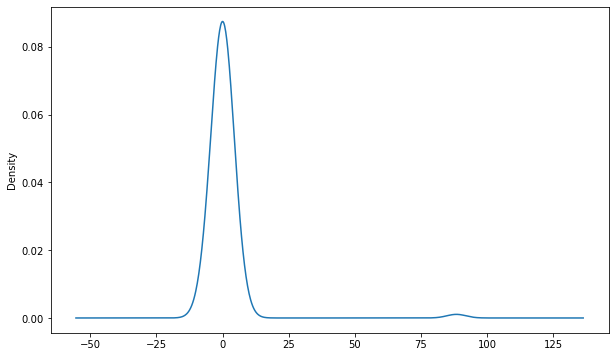

In [94]:
model_fit.resid.plot(kind='kde')

In [162]:
test_data.loc[:, 'Predicted ARIMA'] = prediction


#for some reason the prediction is giving a nan when i assign it 
# the length is equal but the index is wrong to fix it

i = 104
def assing_pred_val(x):
    global i
    i + 1
    return prediction.loc[i]

test_data['Predicted ARIMA'] = test_data['Predicted ARIMA'].apply(assing_pred_val)


/tmp/ipykernel_9703/443385880.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted ARIMA'] = test_data['Predicted ARIMA'].apply(assing_pred_val)


77.10860995762701

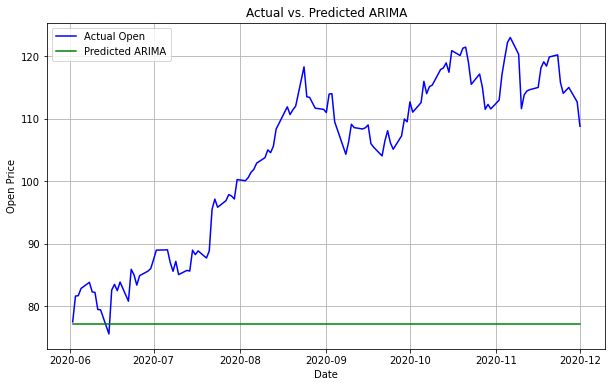

In [163]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(test_data.index), np.array(test_data['Open']), label='Actual Open', color='blue')
plt.plot(np.array(test_data.index), np.array(test_data['Predicted ARIMA']), label='Predicted ARIMA', color='green')

plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Actual vs. Predicted ARIMA')
plt.legend()
plt.grid(True)
plt.show()


## Correlation between sentiment analysis and stock value

In [164]:
corr_mtx = df_bby.corr()

In [165]:
import seaborn as sns

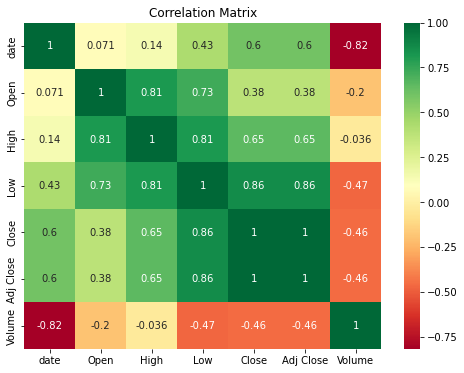

In [166]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_mtx, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix')
plt.show()

In [176]:
Log_open = np.log(df_bby_2020['Open'])
df_bby_2020['Log_Open'] = Log_open
movingAverage = df_bby_2020['Log_Open'].rolling(window= 12).mean()
datanew = Log_open - movingAverage


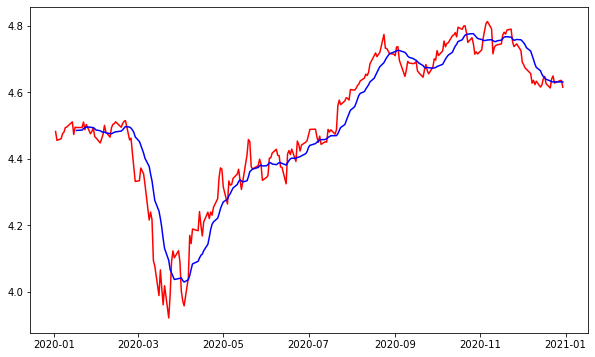

In [177]:
plt.plot(np.array(df_bby_2020.index), np.array(df_bby_2020['Log_Open']), color='red')
plt.plot(movingAverage, color='blue')